# 3 Linear Regression

In [1]:
import plot_utils

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [2]:
import sys
sys.version

'3.9.7 (default, Sep  9 2021, 23:20:13) \n[GCC 9.3.0]'

In [3]:
%matplotlib inline
plt.style.use('seaborn-white')

## 3.1 Simple Linear Regression

In [4]:
advertising = pd.read_csv('Data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:xlabel='TV', ylabel='sales'>

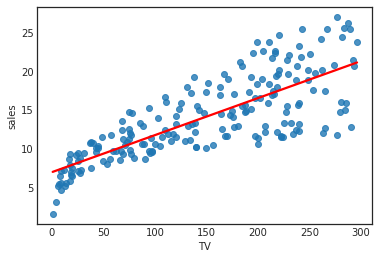

In [5]:
sns.regplot(data=advertising, y="sales", x="TV", ci=None, line_kws=dict(color="red"))

In [6]:
est = smf.ols('sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [7]:
pd.DataFrame(
    {"Value": [np.sqrt(est.mse_resid/est.df_model), est.rsquared, est.fvalue]},
    index=["Residual standard error", "R2", "F-statistic"]
).round(2)

,Value
Residual standard error,3.26
R2,0.61
F-statistic,312.14


## 3.2 Multiple Linear Regression

In [8]:
est = smf.ols('sales ~ TV', advertising).fit()
display(est.summary().tables[1])

est = smf.ols('sales ~ radio', advertising).fit()
display(est.summary().tables[1])

est = smf.ols('sales ~ newspaper', advertising).fit()
display(est.summary().tables[1])

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


In [9]:
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
display(est.summary().tables[1])

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
radio,0.1885,0.009,21.893,0.000,0.172,0.206
newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


In [10]:
advertising.corr().style.background_gradient(cmap='coolwarm').format(precision=3)

,TV,radio,newspaper,sales
TV,1.000,0.055,0.057,0.782
radio,0.055,1.000,0.354,0.576
newspaper,0.057,0.354,1.000,0.228
sales,0.782,0.576,0.228,1.000


In [11]:
pd.DataFrame(
    {"Value": [np.sqrt(est.mse_resid/(est.df_model-2)), est.rsquared, est.fvalue]},
    index=["Residual standard error", "R2", "F-statistic"]
).round(2)

,Value
Residual standard error,1.69
R2,0.90
F-statistic,570.27


## 3.3 Other Considerations in the Regression Model

### 3.3.1 Qualitative Predictors

In [12]:
credit = pd.read_csv('Data/Credit.csv')
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580


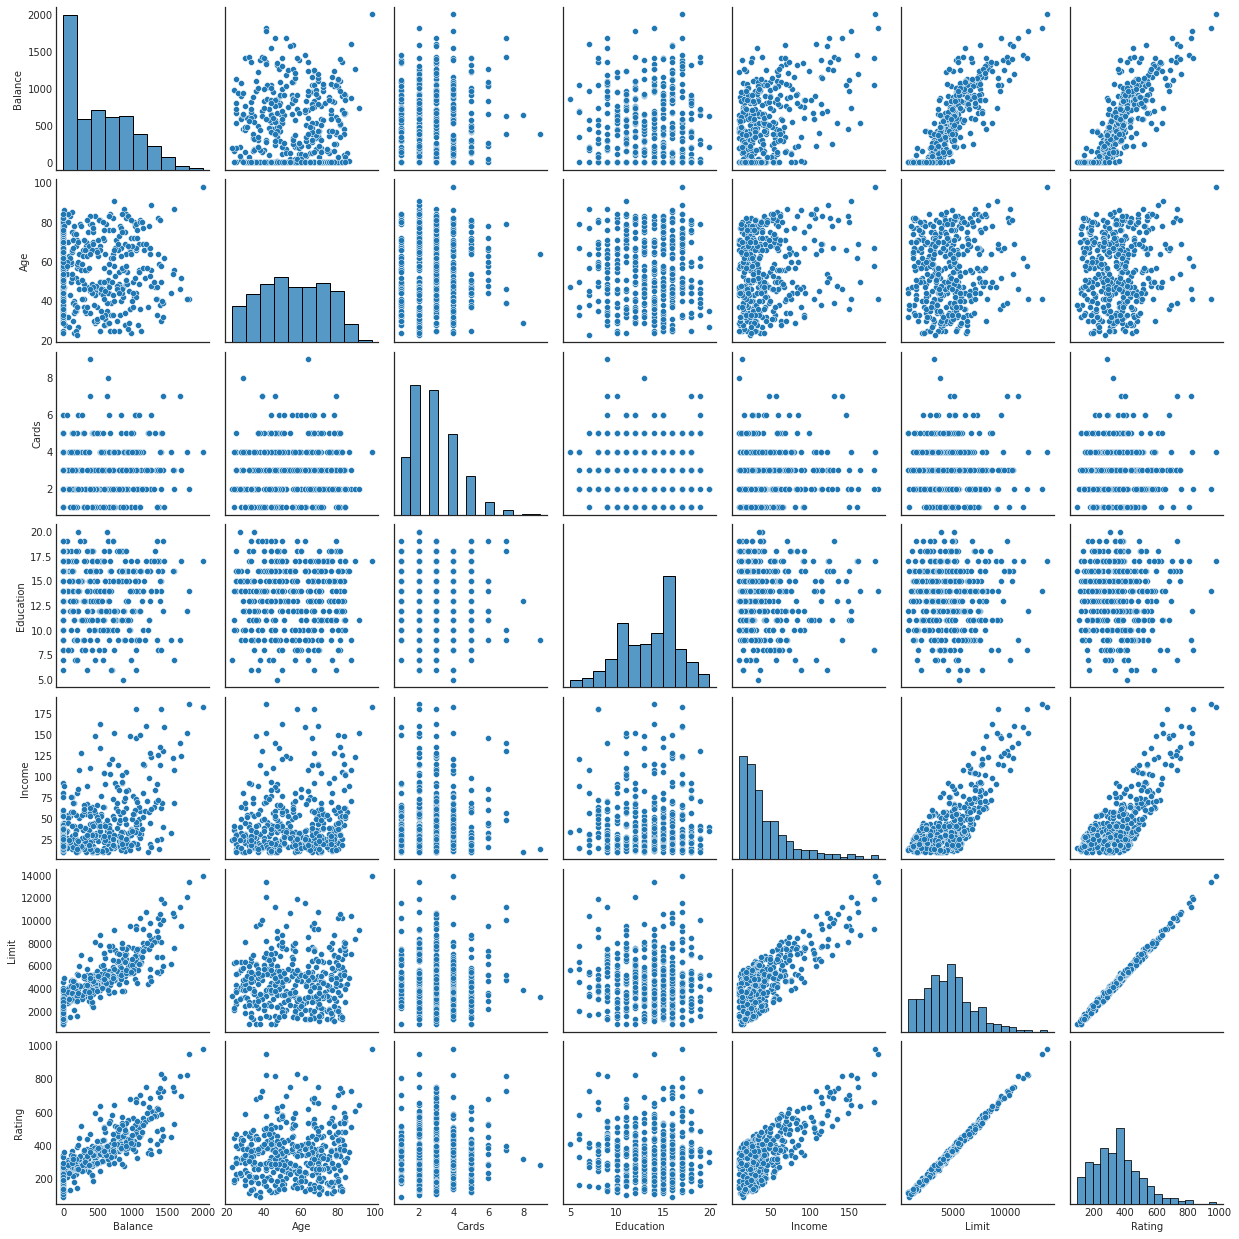

In [13]:
sns.pairplot(credit[['Balance', 'Age', 'Cards', 'Education', 'Income', 'Limit', 'Rating']]);

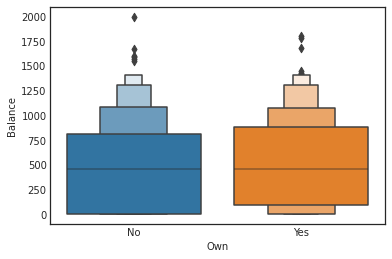

In [14]:
sns.boxenplot(data=credit, y="Balance", x="Own");

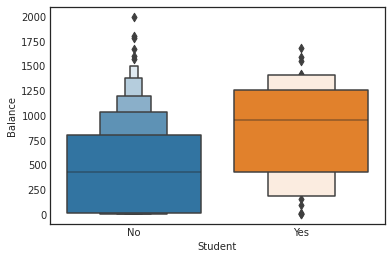

In [15]:
sns.boxenplot(data=credit, y="Balance", x="Student");

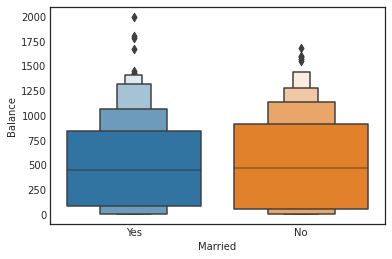

In [16]:
sns.boxenplot(data=credit, y="Balance", x="Married");

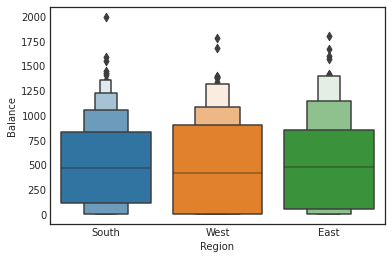

In [17]:
sns.boxenplot(data=credit, y="Balance", x="Region");

#### Qualitative Predictors with Only Two Levels

In [18]:
est = smf.ols('Balance ~ Own', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Own[T.Yes],19.7331,46.051,0.429,0.669,-70.801,110.267


In [19]:
est = smf.ols('Balance ~ C(Own, Sum)', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,519.6697,23.026,22.569,0.000,474.403,564.937
"C(Own, Sum)[S.No]",-9.8666,23.026,-0.429,0.669,-55.134,35.400


#### Qualitative Predictors with More than Two Levels

In [20]:
# ensure the reference level is East
est = smf.ols('Balance ~ C(Region, Treatment("East"))', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
"C(Region, Treatment(""East""))[T.South]",-12.5025,56.681,-0.221,0.826,-123.935,98.930
"C(Region, Treatment(""East""))[T.West]",-18.6863,65.021,-0.287,0.774,-146.515,109.142


In [21]:
est.f_pvalue

0.9574918881199579

### 3.3.2 Extensions of the Linear Model

#### Removing the Additive Assumption

In [22]:
est = smf.ols('sales ~ TV + radio + TV*radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [23]:
est_linear = smf.ols('Balance ~ Income + Student', credit).fit()
est_interaction = smf.ols('Balance ~ Income * Student', credit).fit()

<AxesSubplot:xlabel='Income'>

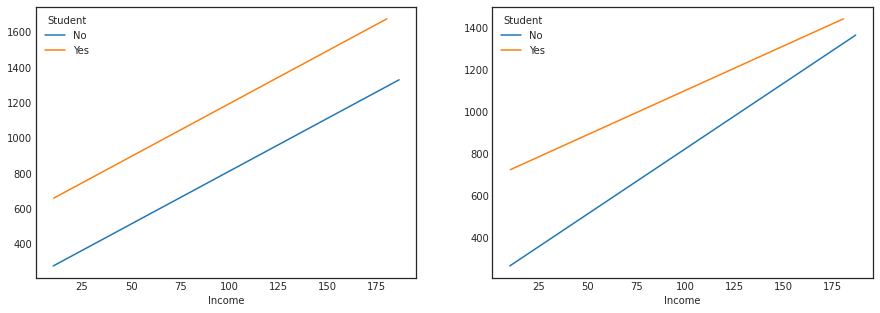

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.lineplot(x=credit.Income, y=est_linear.fittedvalues, hue=credit.Student, ax=ax1)
sns.lineplot(x=credit.Income, y=est_interaction.fittedvalues, hue=credit.Student, ax=ax2)

#### Non-linear Relationships

In [25]:
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [26]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [27]:
est = smf.ols('mpg ~ horsepower + np.power(horsepower, 2)', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
"np.power(horsepower, 2)",0.0012,0.000,10.080,0.000,0.001,0.001


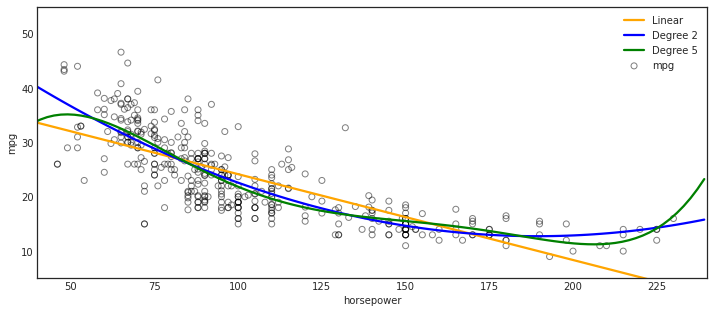

In [28]:
plt.figure(figsize=(12,5))
common_config = dict(ci=None, truncate=False, scatter=False)
plt.scatter(data=auto, x="horsepower", y="mpg", facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(data=auto, x="horsepower", y="mpg", label='Linear', color='orange', **common_config)
sns.regplot(data=auto, x="horsepower", y="mpg", label='Degree 2', order=2, color='blue', **common_config)
sns.regplot(data=auto, x="horsepower", y="mpg", label='Degree 5', order=5, color='g', **common_config)
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

### 3.3.3 Potential Problems

#### 1. Non-linearity of the Data

In [29]:
model_linear = smf.ols('mpg ~ horsepower', auto).fit()
model_quad = smf.ols('mpg ~ horsepower + np.power(horsepower, 2)', auto).fit()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


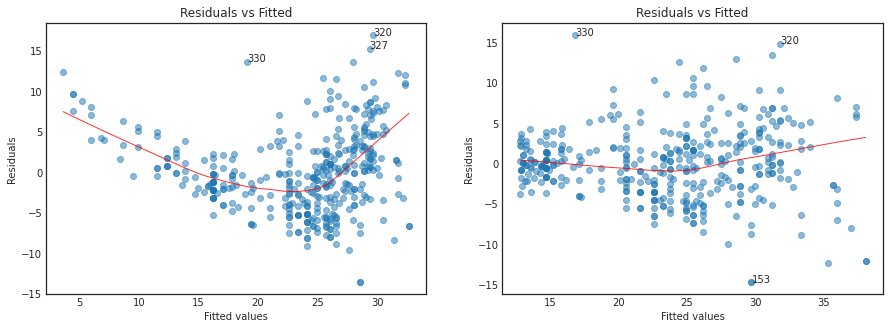

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plot_utils.residuals_vs_fitted(model_linear, ax=ax1)
plot_utils.residuals_vs_fitted(model_quad, ax=ax2)

#### 2. Correlation of Error Terms

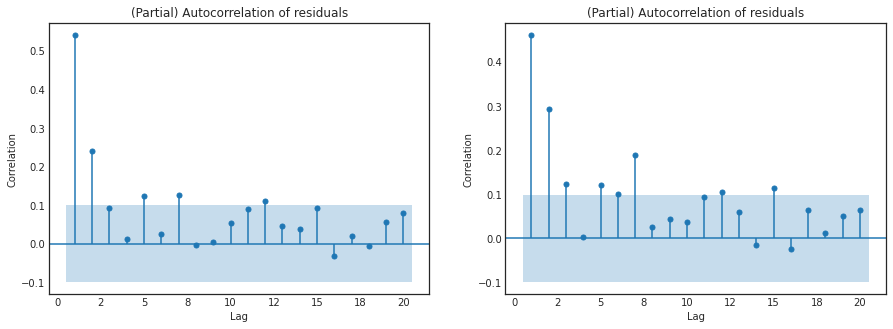

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plot_utils.residuals_autocorrelation(model_linear, ax=ax1);
plot_utils.residuals_autocorrelation(model_quad, ax=ax2);

#### 3. Non-constant Variance of Error Terms

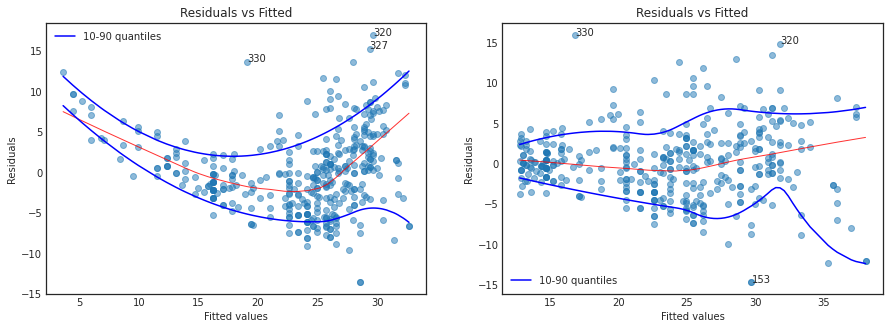

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plot_utils.residuals_vs_fitted(model_linear, ax=ax1, show_quantiles=True)
plot_utils.residuals_vs_fitted(model_quad, ax=ax2, show_quantiles=True)

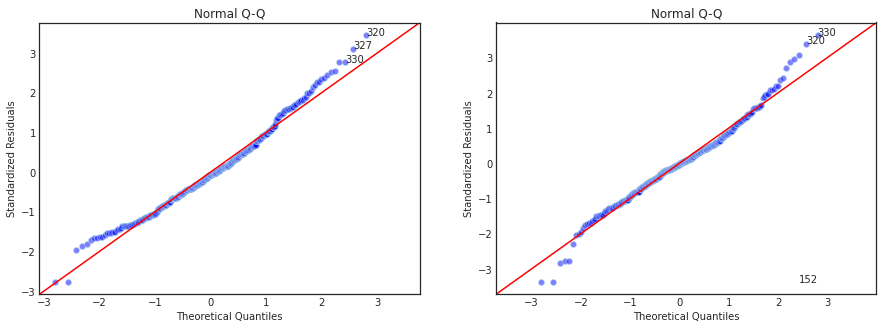

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plot_utils.residuals_normality(model_linear, ax1)
plot_utils.residuals_normality(model_quad, ax2)

#### 4. Outliers

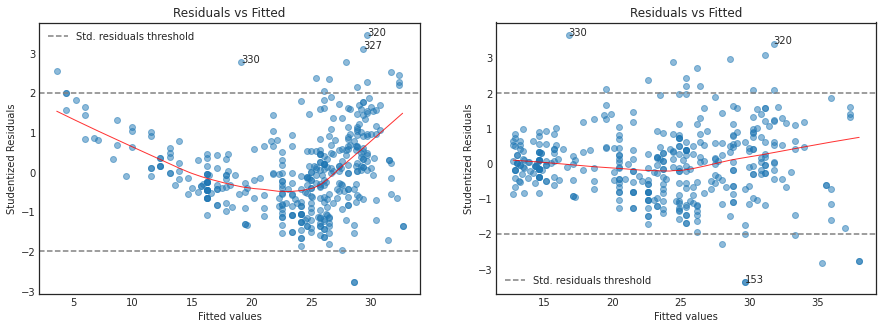

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plot_utils.residuals_vs_fitted(model_linear, ax=ax1, studentized=True)
plot_utils.residuals_vs_fitted(model_quad, ax=ax2, studentized=True)

#### 5. High Leverage Points

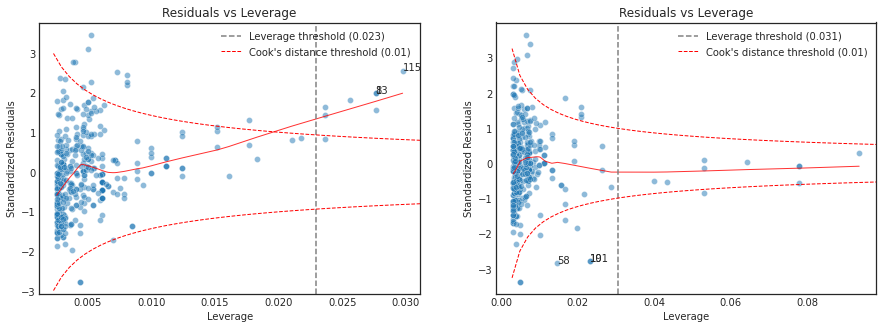

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plot_utils.leverage(model_linear, ax1)
plot_utils.leverage(model_quad, ax2)

#### 6. Collinearity

<AxesSubplot:xlabel='Limit', ylabel='Rating'>

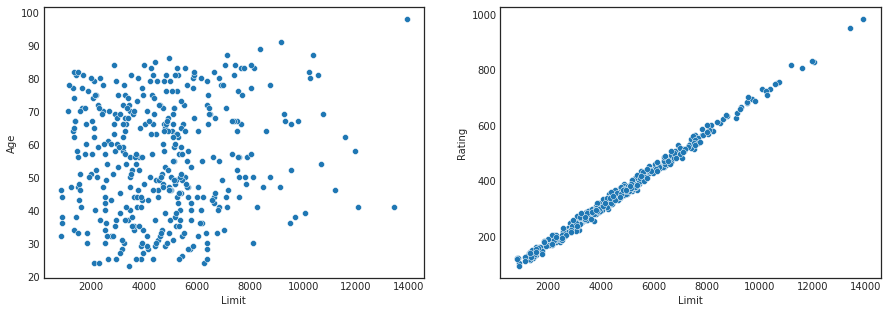

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(data=credit, x="Limit", y="Age", ax=ax1)
sns.scatterplot(data=credit, x="Limit", y="Rating", ax=ax2)

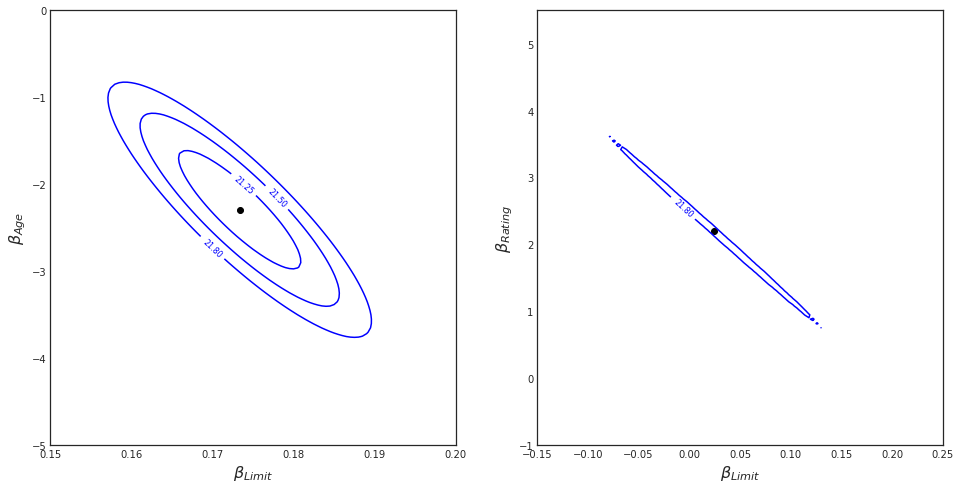

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
model = smf.ols("Balance ~ Limit + Age", data=credit).fit()
plot_utils.rss_contour(model, (0.15, 0.2), (-5, 0), ax1, [21.25, 21.5, 21.8])
model = smf.ols("Balance ~ Limit + Rating", data=credit).fit()
plot_utils.rss_contour(model, (-0.15, 0.25), (-1, 5.5), ax2, [21.25, 21.8])

In [39]:
def model_summary(model):
    results_df = pd.DataFrame({
        "Coefficient": model.params.round(3),
        "Std. error": model.bse.round(3),
        "t-statistic": model.tvalues.round(3),
        "p-value": model.pvalues.round(4),
    }, index=model.model.exog_names)
    results_df.index.rename("name", inplace=True)
    return results_df

In [40]:
model_age = smf.ols("Balance ~ Age + Limit", data=credit).fit()
df_age = model_summary(model_age)
df_age["Model"] = "Model 1"

model_rating = smf.ols("Balance ~ Rating + Limit", data=credit).fit()
df_rating = model_summary(model_rating)
df_rating["Model"] = "Model 2"

pd.concat([df_age, df_rating]).reset_index().set_index(["Model", "name"])

Coefficient  Std. error  t-statistic  p-value
Model   name                                                    
Model 1 Intercept     -173.411      43.828       -3.957   0.0001
        Age             -2.291       0.672       -3.407   0.0007
        Limit            0.173       0.005       34.496   0.0000
Model 2 Intercept     -377.537      45.254       -8.343   0.0000
        Rating           2.202       0.952        2.312   0.0213
        Limit            0.025       0.064        0.384   0.7012

In [41]:
def variance_inflation_factors(model):
    exog_df = pd.DataFrame(model.model.exog, columns=model.model.exog_names)
    leave_one_out_R2 = [
        sm.OLS(exog_df[col].values, exog_df.loc[:, exog_df.columns != col].values).fit().rsquared 
        for col in exog_df
        if col != "Intercept"
    ]
    vifs = pd.Series([1 / (1. - R2) for R2 in leave_one_out_R2], index=exog_df.columns[1:], name='VIF')
    return vifs

In [42]:
model = smf.ols("Balance ~ Age + Rating + Limit", data=credit).fit()
print(f"{model.rsquared:.3f}")
variance_inflation_factors(model).round(2)

0.754


Age         1.01
Rating    160.67
Limit     160.59
Name: VIF, dtype: float64

In [43]:
model = smf.ols("Balance ~ Age + Limit", data=credit).fit()
print(f"{model.rsquared:.3f}")
variance_inflation_factors(model).round(2)

0.750


Age      1.01
Limit    1.01
Name: VIF, dtype: float64

In [44]:
credit["Credit_worthiness"] = (credit["Rating"]/credit["Rating"].std() + credit["Limit"]/credit["Limit"].std())/2

In [45]:
model = smf.ols("Balance ~ Age + Credit_worthiness", data=credit).fit()
print(f"{model.rsquared:.3f}")
variance_inflation_factors(model).round(2)

0.753


Age                  1.01
Credit_worthiness    1.01
Name: VIF, dtype: float64

## 3.5 Comparison of Linear Regression with K-Nearest Neighbors

In [46]:
N = 80
x = np.linspace(-1, 1, N)
a, b = 2, 2
y = a + b*x + stats.norm(0, 0.4).rvs(N)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

data_train_linear = pd.DataFrame({"x": x_train, "y": y_train})
data_test_linear = pd.DataFrame({"x": x_test, "y": y_test})

x_dense = np.linspace(-1, 1, 1000)
y_linear = a + b*x_dense
data_dense_linear = pd.DataFrame({"x": x_dense, "y": y_linear})

In [47]:
knn1 = KNeighborsRegressor(n_neighbors=1)
knn9 = KNeighborsRegressor(n_neighbors=9)
data_dense_linear["y_knn_1"] = (
    knn1
    .fit(data_train_linear.x.values.reshape(-1, 1), data_train_linear.y)
    .predict(data_dense_linear.x.values.reshape(-1, 1))
)
data_dense_linear["y_knn_9"] = (
    knn9
    .fit(data_train_linear.x.values.reshape(-1, 1), data_train_linear.y)
    .predict(data_dense_linear.x.values.reshape(-1, 1))
)

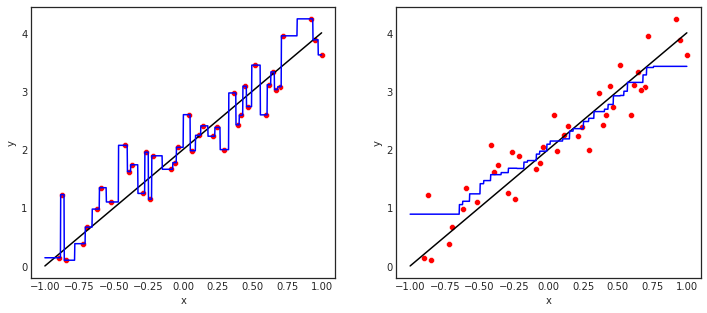

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(data=data_train_linear, x="x", y="y", color="red", ax=ax1)
sns.lineplot(data=data_dense_linear, x="x", y="y", color="black", ax=ax1)
sns.lineplot(data=data_dense_linear, x="x", y="y_knn_1", color="blue", ax=ax1);

sns.scatterplot(data=data_train_linear, x="x", y="y", color="red", ax=ax2)
sns.lineplot(data=data_dense_linear, x="x", y="y", color="black", ax=ax2)
sns.lineplot(data=data_dense_linear, x="x", y="y_knn_9", color="blue", ax=ax2);

In [82]:
def compare_linear_knn(data_train, data_test, data_dense, ax):
    model_linear = smf.ols("y ~ x", data=data_train).fit()
    data_dense["y_linear"] = model_linear.predict(data_dense.x)
    
    data_dense["y_knn_1"] = (
        KNeighborsRegressor(n_neighbors=1).fit(data_train.x.values.reshape(-1, 1), data_train.y)
        .predict(data_dense.x.values.reshape(-1, 1))
    )
    data_dense["y_knn_9"] = (
        KNeighborsRegressor(n_neighbors=9).fit(data_train.x.values.reshape(-1, 1), data_train.y)
        .predict(data_dense.x.values.reshape(-1, 1))
    )
    
    sns.lineplot(data=data_dense, x="x", y="y_linear", color="black", linestyle="--", ax=ax);
    sns.lineplot(data=data_dense, x="x", y="y", color="black", ax=ax)
    sns.lineplot(data=data_dense, x="x", y="y_knn_1", color="blue", lw=1, ax=ax);
    sns.lineplot(data=data_dense, x="x", y="y_knn_9", color="red", lw=1, ax=ax);
 

In [83]:
def linear_knn_mse(data_train, data_test, ax):
    model_linear = smf.ols("y ~ x", data=data_train).fit()
    linear_mse = ((model_linear.predict(data_test.x) - data_test.y)**2).sum()/len(data_test)
    
    Ks = np.linspace(1, 9, 9)
    knn_mse = []
    for K in Ks:
        knn = KNeighborsRegressor(n_neighbors=int(K)).fit(data_train.x.values.reshape(-1, 1), data_train.y)
        mse = ((knn.predict(data_test.x.values.reshape(-1, 1)) - data_test.y)**2).sum()/len(data_test.x)
        knn_mse.append(mse)

    data_knn_mse = pd.DataFrame({"K": Ks, "MSE": knn_mse})
    data_knn_mse["inv_K"] = 1/data_knn_mse["K"]
    
    ax.axhline(y=model_linear.mse_resid, color="black", linestyle="--")
    sns.lineplot(data=data_knn_mse, x="inv_K", y="MSE", color="green", markers=True, linestyle="--", ax=ax);
    sns.scatterplot(data=data_knn_mse, x="inv_K", y="MSE", color="green", ax=ax);
    ax.set_xscale("log")
    ax.set_xticks([0.2, 0.5, 1])
    ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.set_ylim(bottom=0)
    ax.set_xlabel("1/K");
    

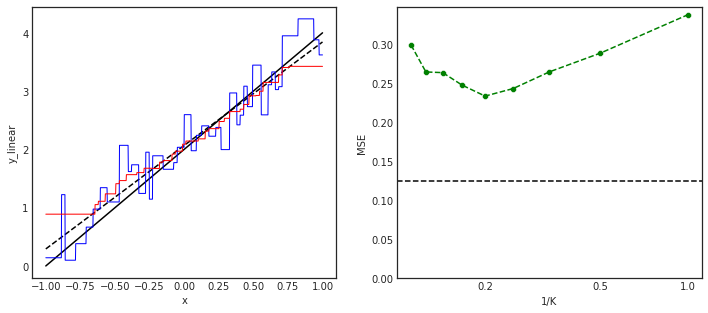

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
compare_linear_knn(data_train_linear, data_test_linear, data_dense_linear, ax1)
linear_knn_mse(data_train_linear, data_test_linear, ax2)

In [74]:
N = 100
x = np.linspace(-1, 1, N)
a, b, c = 0.5, 3, 3.2
y = a + b/(1+np.exp(-c*x)) + stats.norm(0, 0.2).rvs(N)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

data_train_semi_linear = pd.DataFrame({"x": x_train, "y": y_train})
data_test_semi_linear = pd.DataFrame({"x": x_test, "y": y_test})

x_dense = np.linspace(-1, 1, 1000)
y_semi_linear = a + b/(1+np.exp(-c*x_dense))
data_dense_semi_linear = pd.DataFrame({"x": x_dense, "y": y_semi_linear})

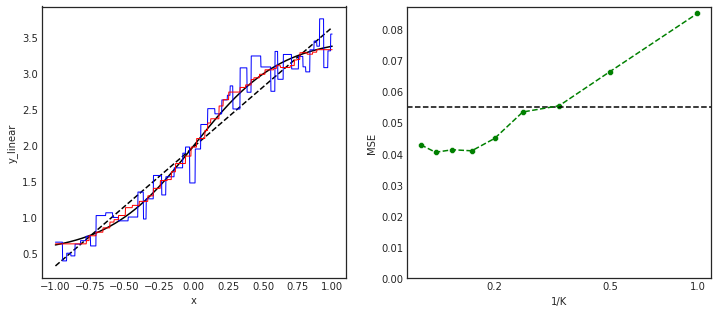

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
compare_linear_knn(data_train_semi_linear, data_test_semi_linear, data_dense_semi_linear, ax1)
linear_knn_mse(data_train_semi_linear, data_test_semi_linear, ax2)

In [76]:
N = 100
x = np.linspace(-1, 1, N)
a, b, c = 0.5, 3, 7
y = a + b/(1+np.exp(-c*x)) + stats.norm(0, 0.3).rvs(N)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

data_train_not_linear = pd.DataFrame({"x": x_train, "y": y_train})
data_test_not_linear = pd.DataFrame({"x": x_test, "y": y_test})

x_dense = np.linspace(-1, 1, 1000)
y_not_linear = a + b/(1+np.exp(-c*x_dense))
data_dense_not_linear = pd.DataFrame({"x": x_dense, "y": y_not_linear})

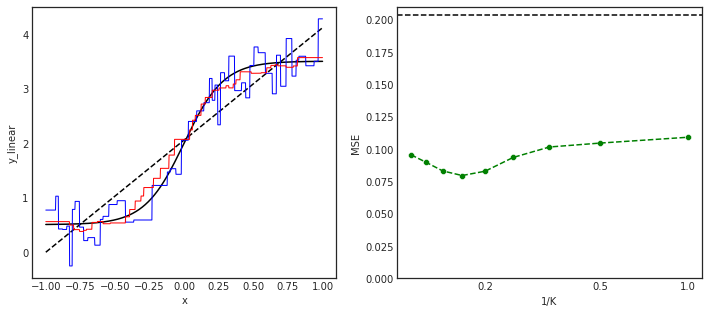

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
compare_linear_knn(data_train_not_linear, data_test_not_linear, data_dense_not_linear, ax1)
linear_knn_mse(data_train_not_linear, data_test_not_linear, ax2)

ValueError: Data must be 1-dimensional

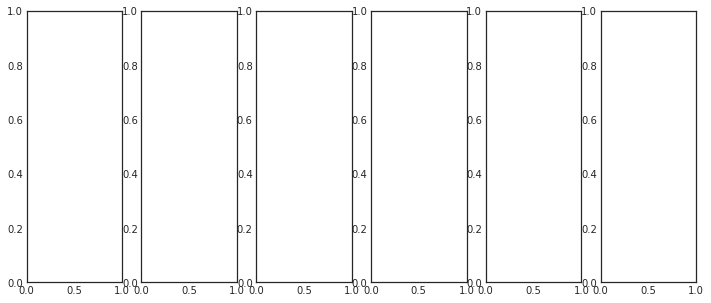

In [102]:
fig, axs = plt.subplots(1, 6, figsize=(12,5))

N = 100
x = np.linspace(-1, 1, N)
a, b, c = 0.5, 3, 7
    
for p in [1, 2, 3, 4, 10, 20]:
    
    y = a + b/(1+np.exp(-c*x)) + stats.norm(0, 0.3).rvs(N)
    x_random = stats.norm(0, 0.3).rvs((N, p))
    x = np.concatenate([x.reshape(-1, 1), x_random], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

    data_train_not_linear = pd.DataFrame({"x": x_train, "y": y_train})
    data_test_not_linear = pd.DataFrame({"x": x_test, "y": y_test})
    
    linear_knn_mse(data_train_not_linear, data_test_not_linear, ax2)

In [95]:
np.concatenate([x.reshape(-1, 1), x.reshape(-1, 1)], axis=1).shape

(100, 2)

In [100]:
.shape

(100, 4)